In [3]:
# !pip install xgboost

In [4]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
import numpy as np
import pandas as pd
from time import time
from pathlib import Path

In [5]:
import numpy as np
x_test = np.load('/home/jovyan/X-IIoTID/x_test.npy')
x_train = np.load('/home/jovyan/X-IIoTID/x_train.npy')
x_val = np.load('/home/jovyan/X-IIoTID/x_val.npy')
y_test = np.load('/home/jovyan/X-IIoTID/y_test.npy')
y_train = np.load('/home/jovyan/X-IIoTID/y_train.npy')
y_val = np.load('/home/jovyan/X-IIoTID/y_val.npy')

In [8]:
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
# xgb = xgb.fit(x_train, y_train)
# xgb_pred = xgb.predict(x_test)

# print("Accuracy: ", accuracy_score(y_test, xgb_pred))
# print("Micro F1 Score: ", f1_score_rep(y_test, xgb_pred, average="micro"))
# print("Macro F1 Score: ", f1_score_rep(y_test, xgb_pred, average="macro"))

FPR: [3.05735600e-05 1.43204926e-04 0.00000000e+00 4.05368554e-04
 0.00000000e+00 0.00000000e+00 9.33807420e-05 1.50782940e-05
 3.67460627e-05 7.13226064e-06 7.19222664e-06 4.39050025e-03
 0.00000000e+00 1.42829597e-05 2.24036085e-05 1.57359789e-04
 0.00000000e+00 3.57140306e-05 0.00000000e+00]
TPR: [0.99989359 0.94210526 0.99761337 0.97978466 0.99977411 0.8
 0.99802956 0.99947292 0.99927902 0.90909091 0.99748111 0.99851057
 1.         0.97044335 0.99936739 0.82978723 1.         0.79912664
 1.        ]
FNR: [1.06405618e-04 5.78947368e-02 2.38663484e-03 2.02153373e-02
 2.25886605e-04 2.00000000e-01 1.97044335e-03 5.27078666e-04
 7.20980534e-04 9.09090909e-02 2.51889169e-03 1.48943242e-03
 0.00000000e+00 2.95566502e-02 6.32611102e-04 1.70212766e-01
 0.00000000e+00 2.00873362e-01 0.00000000e+00]
TNR: [0.99996943 0.9998568  1.         0.99959463 1.         1.
 0.99990662 0.99998492 0.99996325 0.99999287 0.99999281 0.9956095
 1.         0.99998572 0.9999776  0.99984264 1.         0.99996429

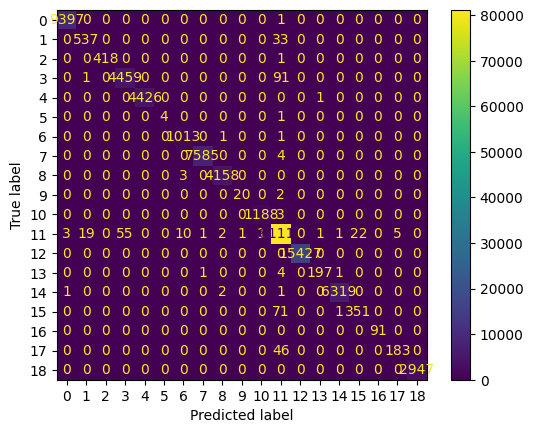

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_digits

xgb = XGBClassifier()
xgb = xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, xgb.predict_proba(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [10]:
# import xgboost as xgb
# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
# import numpy as np
# import pandas as pd
# from time import time
# from pathlib import Path


# # 定义参数
# xgb_params = {
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],  # 学习率
#     'n_estimators': [50, 100, 200],  # 树的数量
#     'max_depth': [3, 6, 9, 12],  # 树的最大深度
#     'min_child_weight': [1, 2, 3],  # 决定最小叶子节点样本权重和
#     'gamma': [0, 0.1, 0.2],  # 用于控制是否后剪枝的参数
#     'subsample': [0.7, 0.8, 0.9],  # 子样本占整个样本集合的比例
#     'colsample_bytree': [0.7, 0.8, 0.9]  # 在建立树时对特征采样的比例
# }

# # 确保结果目录存在
# result_dir = Path('/content/drive/MyDrive/Cybersecurity/Datasets/results')
# if not result_dir.exists():
#     result_dir.mkdir()

# def tune_with_halving_grid_search_xgb(x_train, y_train, param_grid):
#     xgbc = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

#     start = time()
#     halving_xgb_results = HalvingGridSearchCV(
#         xgbc,
#         param_grid,
#         cv=5,
#         factor=2,
#         min_resources='exhaust',
#         scoring='accuracy'
#     ).fit(x_train, y_train)

#     duration = time() - start

#     results = pd.DataFrame(halving_xgb_results.cv_results_)
#     results.to_csv(result_dir / 'halving_xgb_results.csv')

#     # 格式化和排序结果
#     results = results.loc[:, ('iter', 'rank_test_score', 'mean_test_score', 'params')]
#     results.sort_values(by=['iter', 'rank_test_score'], ascending=[False, True], inplace=True)

#     return results, duration

# # 使用验证数据集进行参数调整
# halving_results, halving_duration = tune_with_halving_grid_search_xgb(x_val, y_val, xgb_params)

# print(halving_results.head())

# # 获取最佳参数和分数
# best_score = halving_results['mean_test_score'].iloc[0]
# best_params = halving_results['params'].iloc[0]

# # 使用最佳参数训练 XGBoost 模型
# best_xgb = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
# best_xgb.fit(x_train, y_train)

# # 在测试集上评估
# accuracy = accuracy_score(y_test, best_xgb.predict(x_test))
# micro_f1 = f1_score_rep(y_test, best_xgb.predict(x_test), average="micro")
# macro_f1 = f1_score_rep(y_test, best_xgb.predict(x_test), average="macro")

# # 打印结果
# print(f'Best score for HalvingGridSearchCV is {best_score:.3f}, took {halving_duration:.2f} seconds')
# print(f'Params: {best_params}')
# print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')
# print("Micro F1 Score: ", micro_f1)
# print("Macro F1 Score: ", macro_f1)


In [7]:
from joblib import dump, load

xgb = XGBClassifier()
xgb = xgb.fit(x_train, y_train)

dump(xgb, "/home/jovyan/X-IIoTID/pre_train/xgb.joblib")


['/home/jovyan/X-IIoTID/pre_train/xgb.joblib']

In [14]:
import joblib
from joblib import dump, load
from art.estimators.classification import KerasClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_digits


model = joblib.load("/home/jovyan/X-IIoTID/pre_train/xgb.joblib")

classifier = KerasClassifier(model=model, use_logits=False)


preds = np.argmax(classifier.predict(x_test), axis=1)

# acc = np.sum(preds == np.argmax(y_test, axis=1)) / y_test.shape[0]
# print("Test accuracy on adversarial sample (epsilon = %.2f): %.2f%%" % (epsilon, acc * 100))

y_hat = preds
# y_test_arg = np.argmax(y_test, axis=1)
y_test_arg = y_test
conf_matrix = confusion_matrix(y_test_arg, y_hat)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
accuracy = accuracy_score(y_test_arg, y_hat)
precision_macro = precision_score(y_test_arg, y_hat, average='macro')
precision_micro = precision_score(y_test_arg, y_hat, average='micro')
precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
f1_macro = f1_score(y_test_arg, y_hat, average='macro')
f1_micro = f1_score(y_test_arg, y_hat, average='micro')
# auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
print(f"epsilon = {epsilon}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Accuracy: {accuracy}")
print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
# print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

TypeError: Type of model not recognized:<class 'xgboost.sklearn.XGBClassifier'>